# Supplementary Figure 3
Assuming operation on google colab

In [7]:
# prepare environment
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# prepare environment
!pip install pycombat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# prepare environment
base_dir = "/content/drive/{YOUR PATH}"

import os
os.chdir(base_dir)

In [10]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

from src import difference as diff

In [11]:
# fxn for supplementary figure 3
def prep_data(batch, data, output, condition, name):
    """ prepare data for S figure 4 """
    results = []
    negatives = []
    for c in condition:
        res,nega,response = diff.intra_dc(
            c,data,batch,key_compound='cmap_name',
            vehicle_control=False,control_names=['DMSO','medium'],drop_control=False,
            intra_batch=True,key_batch='batch_id',spearman=False,return_response=True
        )
        res.loc[:,'condition'] = [c] * res.shape[0]
        res = res.reset_index()
        temp = nega.values.ravel()
        temp = pd.DataFrame({'intraDC':temp})
        temp.loc[:,'condition'] = [c[0]] * temp.shape[0]
        nega = temp.reset_index()
        results.append(res)
        negatives.append(nega)
        response.to_csv(base_dir + f"/output/SFig3/{c}_{name}.csv")
    result = pd.concat(results,axis=0,join='inner')
    result = result.reset_index(drop=True)
    result.to_csv(output)
    negative = pd.concat(negatives,axis=0,join='inner')
    return result,negative,results,negatives


def plot_summary(result,negative):
    """ plot data for figure 1 """
    # plot the result
    print('--- main result ---')
    plt.rcParams['font.size'] = 14
    sns.displot(
        data=result, x='intraDC', hue='condition', kind='kde',
        palette='gist_stern', lw=2
        )
    plt.tight_layout()
    plt.show()


def plot_ks(condition,out_ks,result,negative,results,negatives):
    """ plot KS test """
    print('--- KS test ---')
    n_sample = len(condition)
    fig,axes = plt.subplots(n_sample,1,squeeze=False,tight_layout=True,figsize=(6,3*n_sample))
    plt.rcParams['font.size'] = 14
    ks_res = []
    imax = np.max(result['intraDC'])
    imin = np.min(result['intraDC'])
    nmax = np.max(negative['intraDC'])
    nmin = np.min(negative['intraDC'])
    vmax = np.max([imax,nmax])
    vmin = np.min([imin,nmin])
    count = 0
    idx = []
    for r,n,t in zip(results,negatives,condition):
        a = n['intraDC'].values.ravel()
        b = r['intraDC'].values.ravel()
        sns.distplot(a,ax=axes[count,0],hist=False,label='null',color='grey')
        sns.distplot(b,ax=axes[count,0],hist=False,label='intraDC',color='darkgoldenrod')
        axes[count,0].set_title(t)
        axes[count,0].spines['top'].set_visible(False)
        axes[count,0].spines['right'].set_visible(False)
        axes[count,0].set_xlim((vmin - np.abs(vmax) * 0.1,vmax + np.abs(vmax) * 0.1))
        ks_res.append(stats.ks_2samp(a,b))
        count += 1
        idx.append(t[0])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    ks_res2 = pd.DataFrame(ks_res,index=idx)
    ks_res2.to_csv(out_ks)


def main(batch,data,output,out_ks,condition,name):
    """ runner for figure """
    result,negative,results,negatives = prep_data(batch,data,output,condition,name)
    plot_summary(result, negative)
    plot_ks(condition, out_ks ,result, negative, results, negatives)
    print('>> completed')

> employ z score


100%|██████████| 49/49 [00:00<00:00, 349.16it/s]


> employ madz score


100%|██████████| 49/49 [00:00<00:00, 262.66it/s]


> employ robz score


100%|██████████| 49/49 [00:00<00:00, 628.65it/s]


--- main result ---


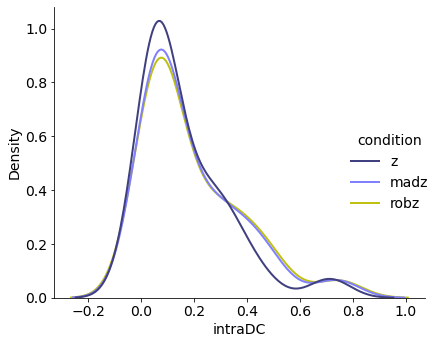

--- KS test ---


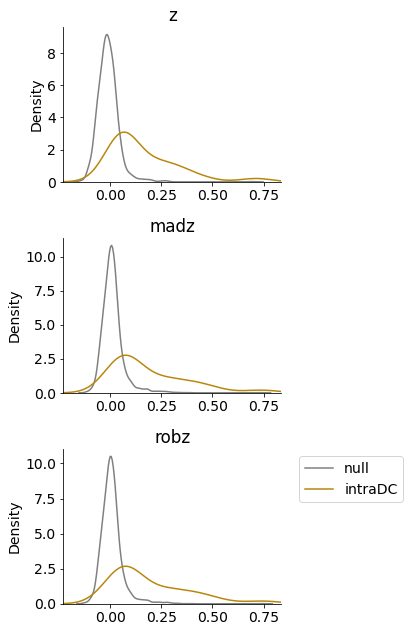

>> completed


In [12]:
# Supplementary Figure 3
# use HT-HG-U133A_EA dataset and compare the following conditions:
# baseline:
# - batch correction, normalized by all samples in each batch
# comparison:
# - z
# - madz
# - robz

warnings.simplefilter('ignore')

# config
batch = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_EA_selected.txt", sep='\t', index_col=0)
data = pd.read_pickle(base_dir + "/data/HTHGU133AEA_done_qn.pkl")
output = base_dir + "/output/SFig3/idc-summary_EA.csv"
out_ks = base_dir + "/output/SFig3/ks_res_EA.csv"
condition = [
    "z",
    "madz",
    "robz"
    ]

# run
main(batch, data, output, out_ks, condition, "EA")

> employ z score


100%|██████████| 1074/1074 [00:05<00:00, 205.70it/s]


> employ madz score


100%|██████████| 1074/1074 [00:04<00:00, 265.71it/s]


> employ robz score


100%|██████████| 1074/1074 [00:03<00:00, 347.53it/s]


--- main result ---


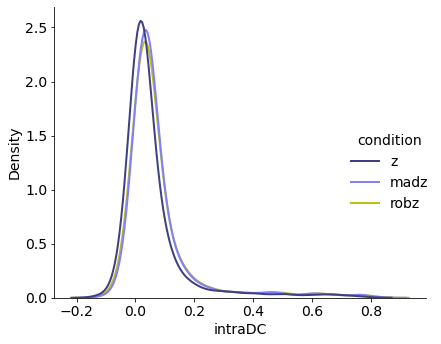

--- KS test ---


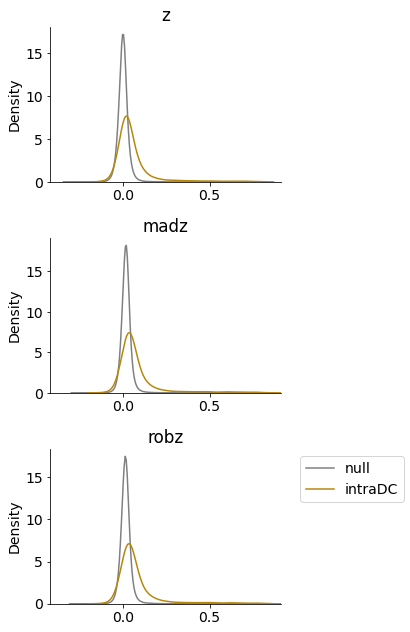

>> completed


In [13]:
# Supplementary Figure 3
# use HT-HG-U133A_A dataset and compare the following conditions:
# baseline:
# - batch correction, normalized by all samples in each batch
# comparison:
# - z
# - madz
# - robz

warnings.simplefilter('ignore')

# config
batch = pd.read_csv(base_dir + "/data/batch_HT-HG-U133A_selected.txt", sep='\t', index_col=0)
data = pd.read_pickle(base_dir + "/data/HTHGU133A_done_qn.pkl")
output = base_dir + "/output/SFig3/idc-summary_A.csv"
out_ks = base_dir + "/output/SFig3/ks_res_A.csv"
condition = [
    "z",
    "madz",
    "robz"
    ]

# run
main(batch, data, output, out_ks, condition, "A")